In [1]:
OUTPUT_PATH = "./out/"

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data_Questionnaire.csv")

df["Avg"] = df.apply(lambda x: (x.Q1 + x.Q2 + x.Q3 + x.Q4 + x.Q5 + x.Q6+x.Q7+x.Q8+x.Q9+x.Q10+x.Q11+x.Q12+x.Q13+x.Q14-x.Q15)/15, axis= 1)

df["IsPointer"] = True
df.loc[(df.PId % 2 == 1) , "IsPointer"] = False

df["Task"] = "Apple"
df.loc[(df.Round == 1) | (df.Round == 2), "Task"] = "Validation"
df.loc[(df.Round == 3), "Round"] = 1
df.loc[(df.Round == 4), "Round"] = 2

df["Correction"] = True
df.loc[(df.SId % 2 == 0) & (df.Task == "Apple") & (df.Round ==1), "Correction"] = False
df.loc[(df.SId % 2 != 0) & (df.Task == "Apple") & (df.Round ==2), "Correction"] = False

df.loc[(df.SId % 4 == 1) & (df.Task == "Validation") & (df.Round == 2), "Correction"] = False
df.loc[(df.SId % 4 == 2) & (df.Task == "Validation") & (df.Round == 2), "Correction"] = False
df.loc[(df.SId % 4 == 3) & (df.Task == "Validation") & (df.Round == 1), "Correction"] = False
df.loc[(df.SId % 4 == 0) & (df.Task == "Validation") & (df.Round == 1), "Correction"] = False

In [4]:
df.groupby(["Task","Round"]).describe().Avg.round(2)

count  mean   std  min   25%   50%   75%   max
Task       Round                                                
Apple      1       24.0  0.33  0.95 -1.8 -0.10  0.33  1.02  1.87
           2       24.0  0.31  0.97 -2.6 -0.27  0.33  1.15  1.67
Validation 1       24.0 -0.32  1.04 -3.0 -0.85 -0.20  0.38  1.13
           2       24.0 -0.28  1.02 -2.8 -1.00  0.07  0.62  1.00

In [5]:
df.groupby("Round").describe().Avg.round(2)

,count,mean,std,min,25%,50%,75%,max
Round,,,,,,,,
1,48.0,0.00,1.04,-3.0,-0.68,0.03,0.75,1.87
2,48.0,0.01,1.03,-2.8,-0.55,0.07,0.80,1.67


In [6]:
df.groupby(["Task", "IsPointer"]).Avg.mean().round(2)

Task        IsPointer
Apple       False       -0.11
            True         0.76
Validation  False       -0.89
            True         0.28
Name: Avg, dtype: float64

In [7]:
df.groupby(["Task", "IsPointer"]).Avg.std().round(2)

Task        IsPointer
Apple       False        1.00
            True         0.68
Validation  False        1.02
            True         0.62
Name: Avg, dtype: float64

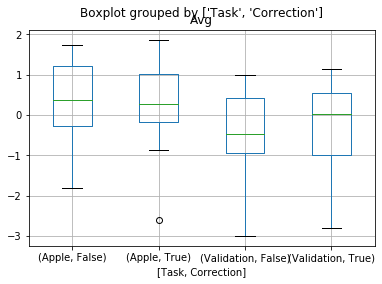

In [8]:
df.boxplot("Avg", by=[ "Task", "Correction"])

In [9]:
dfR = df[["PId", "Correction", "Avg", "Task", "IsPointer"]]
f = OUTPUT_PATH + "R_Presence.csv"
dfR.to_csv(f, index=None)
f

'./out/R_Presence.csv'

In [10]:
dfR = df[df.Task == "Apple"].groupby(["PId", "Correction", "IsPointer"]).mean().reset_index()[["PId", "Correction", "Q16", "IsPointer"]]
f = OUTPUT_PATH + "R_Q16.csv"
dfR.to_csv(f, index=None)
f
dfR.groupby("Correction").Q16.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Correction,,,,,,,,
False,24.0,-0.33,2.06,-3.0,-3.0,0.0,1.00,3.0
True,24.0,-0.17,2.14,-3.0,-3.0,0.0,1.25,3.0


In [11]:
dfR = df[df.Task == "Apple"].groupby(["PId", "Correction", "IsPointer"]).mean().reset_index()[["PId", "Correction", "Q17", "IsPointer"]]
f = OUTPUT_PATH + "R_Q17.csv"
dfR.to_csv(f, index=None)
f
dfR.groupby("Correction").Q17.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Correction,,,,,,,,
False,24.0,0.58,1.47,-3.0,0.0,0.5,2.0,3.0
True,24.0,0.50,1.29,-3.0,0.0,0.5,1.0,3.0


In [12]:
dfR = df[df.Task == "Apple"].groupby(["PId", "Correction", "IsPointer"]).mean().reset_index()[["PId", "Correction", "Q18", "IsPointer"]]
f = OUTPUT_PATH + "R_Q18.csv"
dfR.to_csv(f, index=None)
f
dfR.groupby("Correction").Q18.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Correction,,,,,,,,
False,24.0,-0.33,1.43,-3.0,-1.00,0.0,0.00,3.0
True,24.0,-0.71,1.71,-3.0,-2.25,0.0,0.25,3.0
